In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('CardioGoodFitness.csv')

In [3]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [5]:
df.sample(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
78,TM195,47,Male,16,Partnered,4,3,56850,94
60,TM195,33,Female,16,Partnered,3,3,46617,85
155,TM798,25,Male,18,Partnered,6,5,75946,240
5,TM195,20,Female,14,Partnered,3,3,32973,66
142,TM798,22,Male,18,Single,4,5,48556,200
120,TM498,33,Male,13,Partnered,4,4,53439,170
16,TM195,23,Female,14,Single,2,3,34110,103
105,TM498,25,Male,16,Partnered,2,3,50028,53
94,TM498,24,Female,14,Single,3,2,40932,85
71,TM195,38,Male,16,Partnered,3,3,56850,75


In [6]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [9]:
df.shape

(180, 9)

In [10]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Product,180,3,TM195,80,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,180.0,NaN,NaN,NaN,28.788889,6.943498,18.0,24.0,26.0,33.0,50.0
Gender,180,2,Male,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,180.0,NaN,NaN,NaN,15.572222,1.617055,12.0,14.0,16.0,16.0,21.0
MaritalStatus,180,2,Partnered,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Usage,180.0,NaN,NaN,NaN,3.455556,1.084797,2.0,3.0,3.0,4.0,7.0
Fitness,180.0,NaN,NaN,NaN,3.311111,0.958869,1.0,3.0,3.0,4.0,5.0
Income,180.0,NaN,NaN,NaN,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.0,104581.0
Miles,180.0,NaN,NaN,NaN,103.194444,51.863605,21.0,66.0,94.0,114.75,360.0


In [13]:
df.pivot_table(index=['Product', 'Gender'], aggfunc='mean')

Age  Education   Fitness        Income       Miles  \
Product Gender                                                             
TM195   Female  28.450000  15.100000  2.875000  46020.075000   76.200000   
        Male    28.650000  14.975000  3.050000  46815.975000   89.375000   
TM498   Female  29.103448  15.206897  2.862069  49336.448276   87.344828   
        Male    28.709677  15.032258  2.935484  48634.258065   88.483871   
TM798   Female  27.000000  17.857143  4.571429  73633.857143  180.000000   
        Male    29.545455  17.212121  4.636364  75825.030303  164.121212   

                   Usage  
Product Gender            
TM195   Female  2.900000  
        Male    3.275000  
TM498   Female  3.137931  
        Male    3.000000  
TM798   Female  5.000000  
        Male    4.727273

In [14]:
pd.crosstab(index=df['Gender'], columns=df['Product'])

Product,TM195,TM498,TM798
Gender,,,
Female,40,29,7
Male,40,31,33


In [15]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [16]:
df[df['Product'] == 'TM195'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,80.0,28.5500,7.221452,18.0,23.0,26.0,33.0,50.0
Education,80.0,15.0375,1.216383,12.0,14.0,16.0,16.0,18.0
Usage,80.0,3.0875,0.782624,2.0,3.0,3.0,4.0,5.0
Fitness,80.0,2.9625,0.664540,1.0,3.0,3.0,3.0,5.0
Income,80.0,46418.0250,9075.783190,29562.0,38658.0,46617.0,53439.0,68220.0
Miles,80.0,82.7875,28.874102,38.0,66.0,85.0,94.0,188.0


In [17]:
df[df['Product'] == 'TM498'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,60.0,28.900000,6.645248,19.0,24.0,26.0,33.25,48.0
Education,60.0,15.116667,1.222552,12.0,14.0,16.0,16.00,18.0
Usage,60.0,3.066667,0.799717,2.0,3.0,3.0,3.25,5.0
Fitness,60.0,2.900000,0.629770,1.0,3.0,3.0,3.00,4.0
Income,60.0,48973.650000,8653.989388,31836.0,44911.5,49459.5,53439.00,67083.0
Miles,60.0,87.933333,33.263135,21.0,64.0,85.0,106.00,212.0


In [18]:
df[df['Product'] == 'TM798'].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,40.0,29.100,6.971738,22.0,24.75,27.0,30.25,48.0
Education,40.0,17.325,1.639066,14.0,16.00,18.0,18.00,21.0
Usage,40.0,4.775,0.946993,3.0,4.00,5.0,5.00,7.0
Fitness,40.0,4.625,0.667467,3.0,4.00,5.0,5.00,5.0
Income,40.0,75441.575,18505.836720,48556.0,58204.75,76568.5,90886.00,104581.0
Miles,40.0,166.900,60.066544,80.0,120.00,160.0,200.00,360.0


In [19]:
df.quantile(q=0.5, axis=0)

Age             26.0
Education       16.0
Usage            3.0
Fitness          3.0
Income       50596.5
Miles           94.0
Name: 0.5, dtype: float64

In [20]:
df.quantile(q=0.75, axis=0) - df.quantile(q=0.25, axis=0)

Age              9.00
Education        2.00
Usage            1.00
Fitness          1.00
Income       14609.25
Miles           48.75
dtype: float64

In [21]:
df['Income'].quantile(q=0.95)

90948.24999999999

In [22]:
df[df['Income'] > df['Income'].quantile(q=0.95)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
162,TM798,28,Female,18,Partnered,6,5,92131,180
168,TM798,30,Male,18,Partnered,5,4,103336,160
169,TM798,30,Male,18,Partnered,5,5,99601,150
171,TM798,33,Female,18,Partnered,4,5,95866,200
172,TM798,34,Male,16,Single,5,5,92131,150
173,TM798,35,Male,16,Partnered,4,5,92131,360
174,TM798,38,Male,18,Partnered,5,5,104581,150
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [23]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [24]:
df['Usage'].quantile(q=0.75)

4.0

In [25]:
df[df['Usage'] > df['Usage'].quantile(q=0.75)]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
8,TM195,21,Male,15,Single,5,4,35247,141
23,TM195,24,Female,16,Partnered,5,5,44343,188
84,TM498,21,Female,14,Partnered,5,4,34110,212
100,TM498,25,Female,14,Partnered,5,3,47754,106
123,TM498,33,Female,16,Partnered,5,3,53439,95
144,TM798,23,Female,18,Single,5,4,53536,100
148,TM798,24,Female,16,Single,5,5,52291,200
149,TM798,24,Male,16,Single,5,5,49801,160
152,TM798,25,Female,18,Partnered,5,5,61006,200
154,TM798,25,Male,18,Partnered,6,4,70966,180


In [26]:
df.pivot_table(index='Product', columns='Gender', aggfunc='mean')

Age             Education              Fitness            \
Gender      Female       Male     Female       Male    Female      Male   
Product                                                                   
TM195    28.450000  28.650000  15.100000  14.975000  2.875000  3.050000   
TM498    29.103448  28.709677  15.206897  15.032258  2.862069  2.935484   
TM798    27.000000  29.545455  17.857143  17.212121  4.571429  4.636364   

               Income                     Miles                 Usage  \
Gender         Female          Male      Female        Male    Female   
Product                                                                 
TM195    46020.075000  46815.975000   76.200000   89.375000  2.900000   
TM498    49336.448276  48634.258065   87.344828   88.483871  3.137931   
TM798    73633.857143  75825.030303  180.000000  164.121212  5.000000   

                   
Gender       Male  
Product            
TM195    3.275000  
TM498    3.000000  
TM798    4.727273

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Usage'}>,
        <AxesSubplot:title={'center':'Fitness'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Miles'}>]], dtype=object)

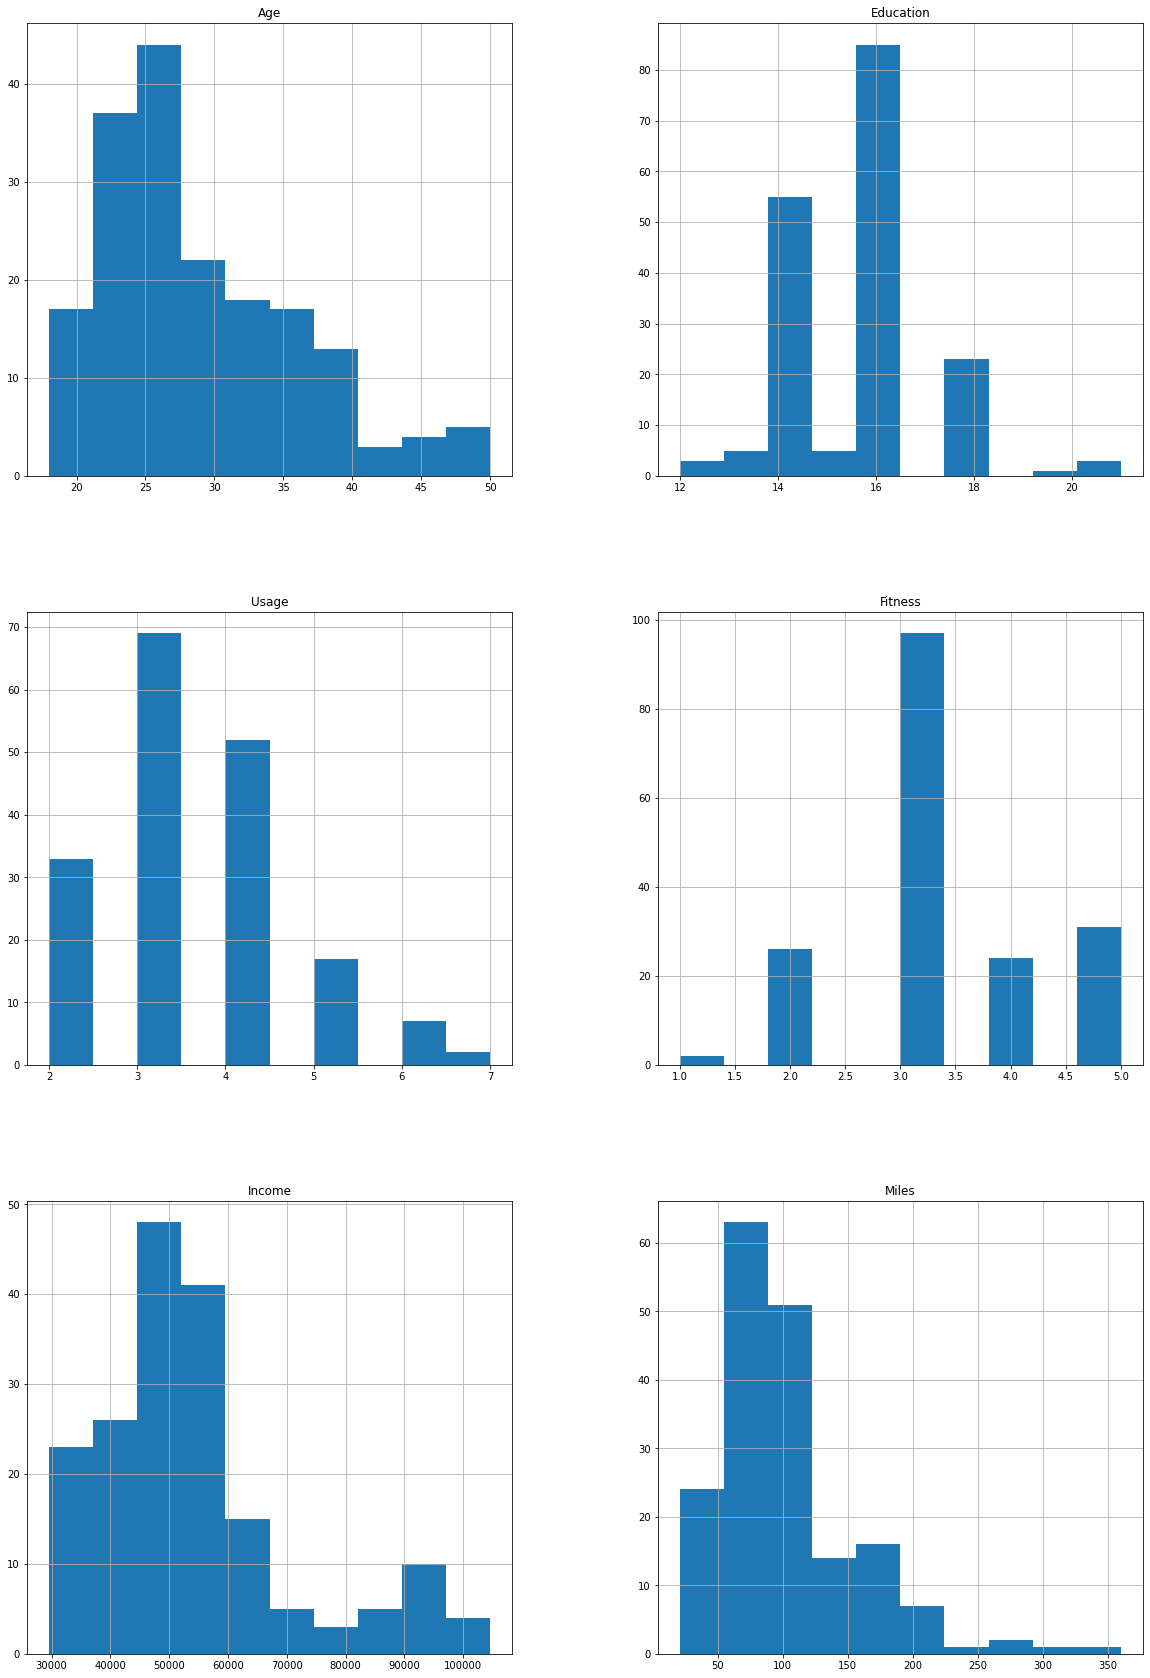

In [27]:
df.hist(figsize=(20,30))

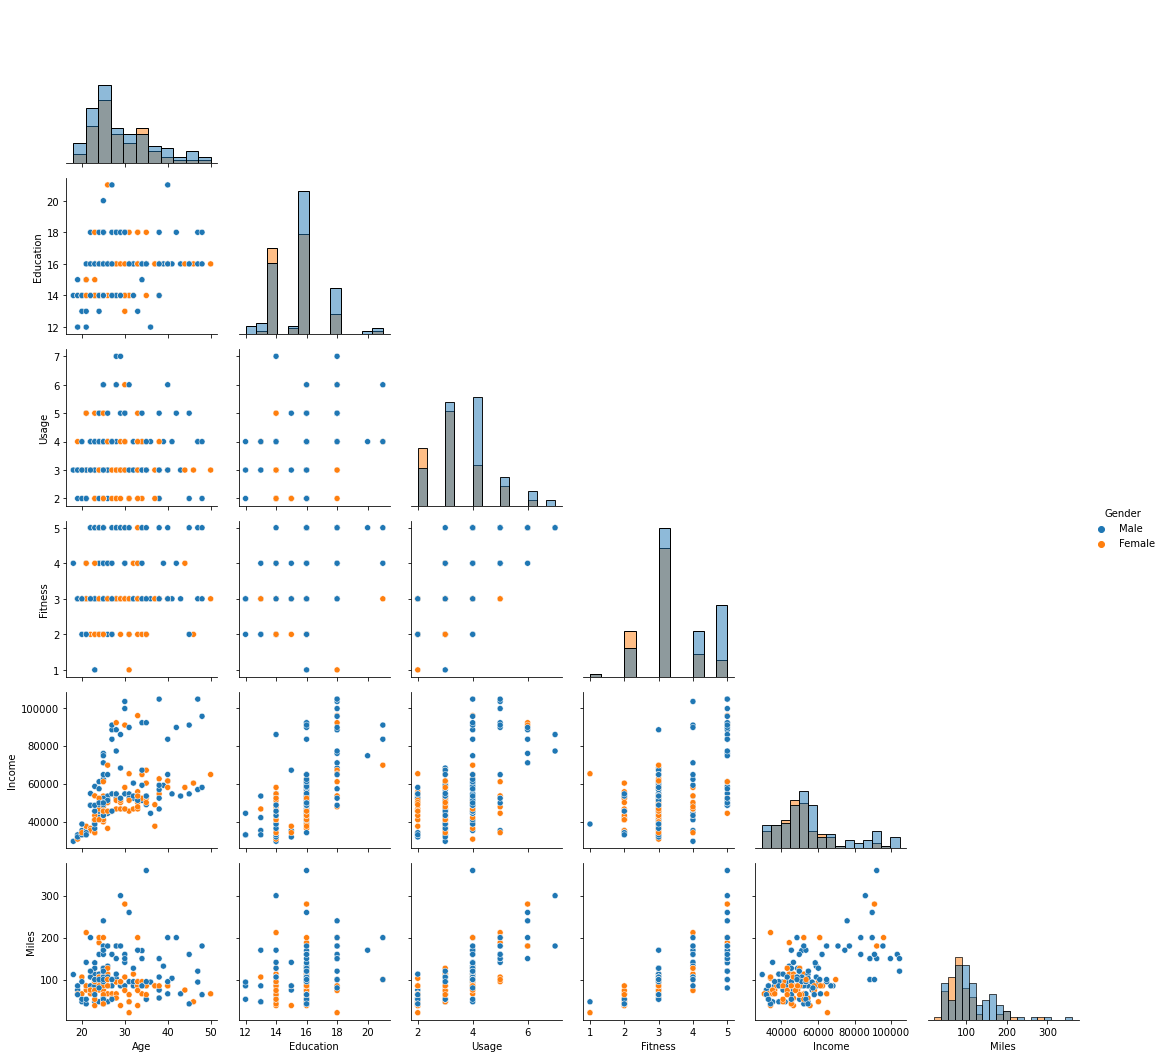

In [28]:
g = sns.PairGrid(df, hue="Gender", corner=True)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

<AxesSubplot:xlabel='Product', ylabel='count'>

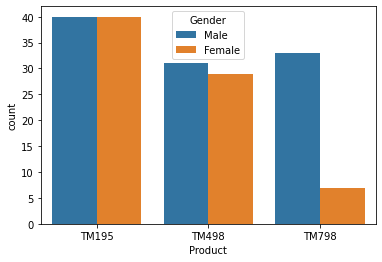

In [29]:
sns.countplot(x="Product", hue="Gender", data=df)

<AxesSubplot:xlabel='Age', ylabel='Count'>

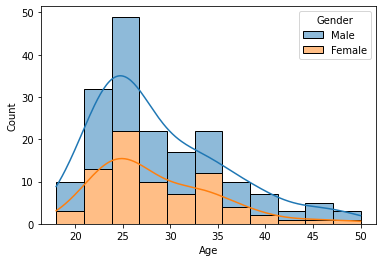

In [30]:
sns.histplot(x='Age', data=df, kde=True, hue='Gender', multiple='stack' )

<AxesSubplot:xlabel='Income', ylabel='Count'>

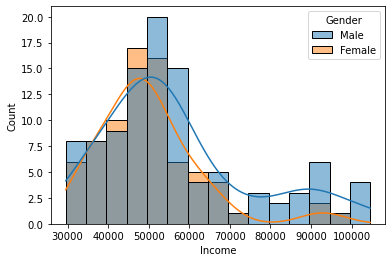

In [31]:
sns.histplot(x='Income', data=df, kde=True, hue='Gender' )

<AxesSubplot:xlabel='Education', ylabel='Count'>

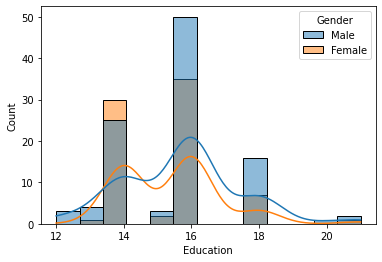

In [32]:
sns.histplot(x='Education', data=df, kde=True, hue='Gender' )

<AxesSubplot:xlabel='Usage', ylabel='Count'>

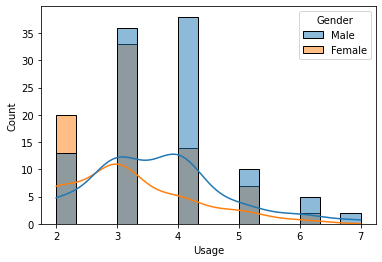

In [33]:
sns.histplot(x='Usage', data=df, kde=True, hue='Gender' )

In [34]:
# trying to loop through to make charts
# my_list = ['Age', 'Education', 'Income', 'Usage']

# for col in my_list:
#     sns.histplot(x=col, data=df, kde=True, hue='Gender')

/Users/franksellhausen/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


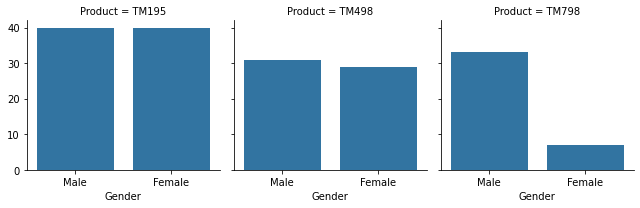

In [35]:
g = sns.FacetGrid(df, col="Product")
g.map(sns.countplot, "Gender")

In [36]:
df['Income'].quantile(q=0.8)

61398.0

In [37]:
df['Usage'].quantile(q=0.8)

4.0

In [38]:
df[(df['Income'] > df['Income'].quantile(q=.8)) | (df['Usage'] > df['Usage'].quantile(q=.8))]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
8,TM195,21,Male,15,Single,5,4,35247,141
23,TM195,24,Female,16,Partnered,5,5,44343,188
50,TM195,29,Male,18,Partnered,3,3,68220,85
65,TM195,35,Female,18,Single,3,3,67083,85
79,TM195,50,Female,16,Partnered,3,3,64809,66
84,TM498,21,Female,14,Partnered,5,4,34110,212
100,TM498,25,Female,14,Partnered,5,3,47754,106
117,TM498,31,Female,18,Single,2,1,65220,21
123,TM498,33,Female,16,Partnered,5,3,53439,95
125,TM498,34,Female,16,Partnered,4,3,64809,95


In [39]:
premium = df[(df['Income'] > df['Income'].quantile(q=.8)) | (df['Usage'] > df['Usage'].quantile(q=.8))]

In [40]:
len(premium.index)

45

In [41]:
np.any(df['Income']>1_000_000)

False

In [42]:
np.add.reduce(df['Usage'])

622

In [43]:
np.add.reduce(df['Miles'])

18575

In [44]:
df.index

RangeIndex(start=0, stop=180, step=1)

In [45]:
corr = df.corr(method='pearson')
corr

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


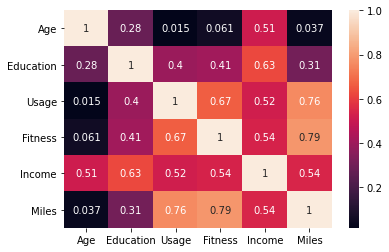

In [46]:
sns.heatmap(corr, annot=True)
plt.show()

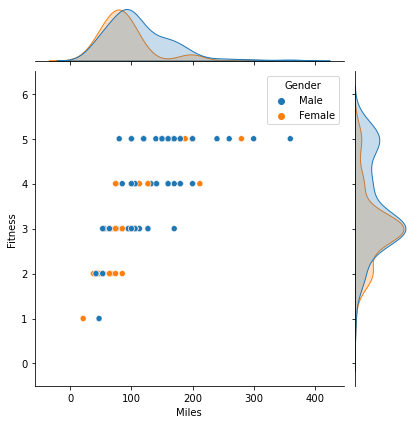

In [47]:
sns.jointplot(data=df, x='Miles', y='Fitness', hue='Gender')

<AxesSubplot:xlabel='Miles', ylabel='Fitness'>

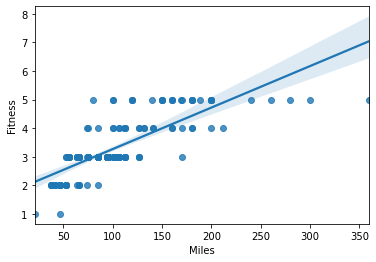

In [48]:
sns.regplot(data=df, x='Miles', y='Fitness')

<AxesSubplot:ylabel='Density'>

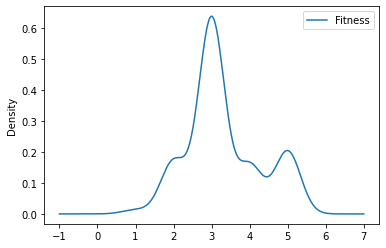

In [49]:
df.plot(y='Fitness', kind='kde')

In [50]:
#df_merge_all['age_group']=pd.cut(df_merge_all.age, bins=(0,20,40,55,100),
#            labels=('Teenager','Adult','Middle Age','Elderly'))

In [62]:
df['Fitness Category'] = pd.cut(df.Fitness, bins=np.quantile(a=df.Fitness, .25), np.quantile(a=df.Fitness, 0.5), np.quantile(a=df.Fitness, 0.75), labels=('low', 'medium', 'high'))

SyntaxError: positional argument follows keyword argument (<ipython-input-62-7892f45a998b>, line 1)

In [100]:
df['Fitness Category'] = pd.qcut(df['Fitness'], 2, labels=['Below Median', 'Above Median'], duplicates='drop')

In [102]:
df['Usage Category'] = pd.qcut(df['Usage'], 3, labels=['Low', "Medium", "High"], duplicates='drop')

In [106]:
df['Miles Category'] = pd.qcut(df['Miles'], 3, labels=['Low', "Medium", "High"])

In [108]:
df['Income Category'] = pd.qcut(df['Income'], 3, labels=['Low', "Medium", "High"])

In [109]:
df.head(25)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness Category,Usage Category,Miles Category,Income Category
0,TM195,18,Male,14,Single,3,4,29562,112,Above Median,Low,High,Low
1,TM195,19,Male,15,Single,2,3,31836,75,Below Median,Low,Low,Low
2,TM195,19,Female,14,Partnered,4,3,30699,66,Below Median,Medium,Low,Low
3,TM195,19,Male,12,Single,3,3,32973,85,Below Median,Low,Medium,Low
4,TM195,20,Male,13,Partnered,4,2,35247,47,Below Median,Medium,Low,Low
5,TM195,20,Female,14,Partnered,3,3,32973,66,Below Median,Low,Low,Low
6,TM195,21,Female,14,Partnered,3,3,35247,75,Below Median,Low,Low,Low
7,TM195,21,Male,13,Single,3,3,32973,85,Below Median,Low,Medium,Low
8,TM195,21,Male,15,Single,5,4,35247,141,Above Median,High,High,Low
9,TM195,21,Female,15,Partnered,2,3,37521,85,Below Median,Low,Medium,Low


<AxesSubplot:xlabel='Usage Category', ylabel='Count'>

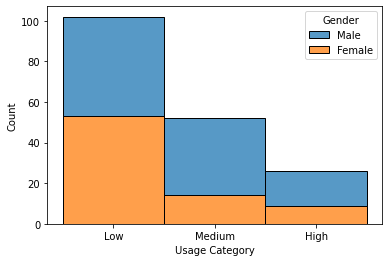

In [119]:
sns.histplot(df, x='Usage Category', hue='Gender', multiple='stack')

<AxesSubplot:xlabel='Miles Category', ylabel='Count'>

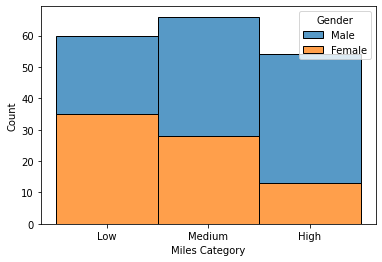

In [116]:
sns.histplot(df, x='Miles Category', hue='Gender', multiple='stack')

<AxesSubplot:xlabel='Fitness Category', ylabel='Count'>

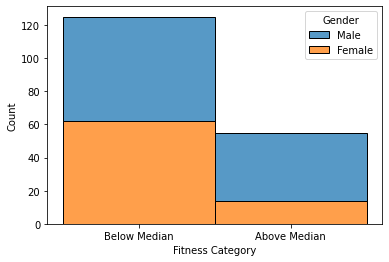

In [117]:
sns.histplot(df, x='Fitness Category', hue='Gender', multiple='stack')

<AxesSubplot:xlabel='Income Category', ylabel='Count'>

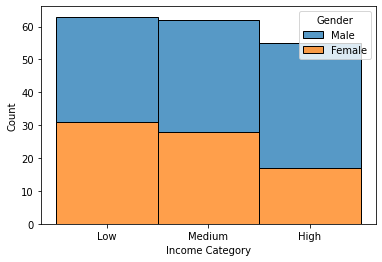

In [120]:
sns.histplot(df, x='Income Category', hue='Gender', multiple='stack')

In [133]:
df.pivot_table(index='Product', columns='Usage Category', values='Fitness')

Usage Category,Low,Medium,High
Product,,,
TM195,2.821429,3.181818,4.500000
TM498,2.822222,3.083333,3.333333
TM798,5.000000,4.444444,4.761905


In [138]:
print(df[df['Product'] == "TM498"]['Fitness'].max())
print(df[df['Product'] == "TM195"]['Fitness'].max())
print(df[df['Product'] == "TM798"]['Fitness'].max())

4
5
5


In [159]:
# curious to know which product categories have most people self-rating '5' for fitness
df_5rated = df[df['Fitness'] == 5]
df_5rated.groupby(by='Product')['Fitness'].count()

Product
TM195     2
TM798    29
Name: Fitness, dtype: int64

In [164]:
df.groupby(by='Product').count()

,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Fitness Category,Usage Category,Miles Category,Income Category
Product,,,,,,,,,,,,
TM195,80,80,80,80,80,80,80,80,80,80,80,80
TM498,60,60,60,60,60,60,60,60,60,60,60,60
TM798,40,40,40,40,40,40,40,40,40,40,40,40


In [167]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [175]:
df_5rated[df_5rated['Product'] == 'TM798'].count() / df[df['Product'] == 'TM798']['Product'].count() 

Product             0.725
Age                 0.725
Gender              0.725
Education           0.725
MaritalStatus       0.725
Usage               0.725
Fitness             0.725
Income              0.725
Miles               0.725
Fitness Category    0.725
Usage Category      0.725
Miles Category      0.725
Income Category     0.725
dtype: float64

In [139]:

## df pivot practice

dfplay = pd.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                           'two'],
                   'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'baz': [1, 2, 3, 4, 5, 6],
                   'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [125]:
dfplay.head()

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w


In [127]:
dfplay.pivot(index='bar', columns='zoo', values='baz')

zoo,q,t,w,x,y,z
bar,,,,,,
A,4.0,NaN,NaN,1.0,NaN,NaN
B,NaN,NaN,5.0,NaN,2.0,NaN
C,NaN,6.0,NaN,NaN,NaN,3.0
